In [105]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci

2D Gravity IVP

In [135]:
def func(t,y):
    # The right-hand side for the 2D gravity ODE
    dy = np.zeros((4,))
    dy[0] = y[2]
    dy[1] = y[3]
    aux = y[0]*y[0]+y[1]*y[1]
    dy[2] = -y[0]/aux
    dy[3] = -y[1]/aux
    return dy

def EnergyFunc(y):
    return 0.5*np.log(y[0]**2+y[1]**2) + 0.5*y[2]**2 + 0.5*y[3]**2

def EnergyFuncAll(y):
    return 0.5*np.log(y[0,:]**2+y[1,:]**2) + 0.5*y[2,:]**2 + 0.5*y[3,:]**2
    
def plot_helper(tt,sol,method_label,N):
    sol = np.array(sol)
    plt.rcParams.update({'font.size': 11})
    fig, ax = plt.subplots(figsize=(4,4))
    plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='Exact solution')
    plt.plot(sol[:,0],sol[:,1],linewidth=2,label=method_label)  
    plt.title(f"2D gravity ODE (N={N})")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_aspect(1)
# initial condition for the unit circle solution
y0 = np.array([1,0,0,1])

Norm (N=20):  44128462199.63249
Norm (N=40):  3.20786627409637e+23
Norm (N=80):  2.480186614029448e+50


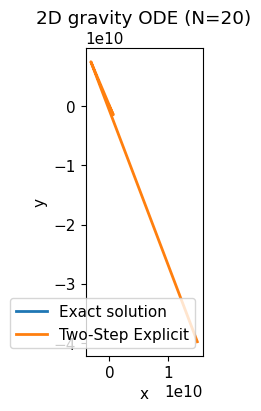

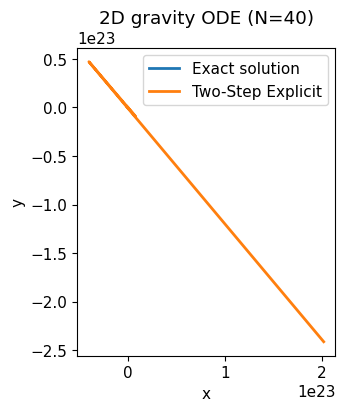

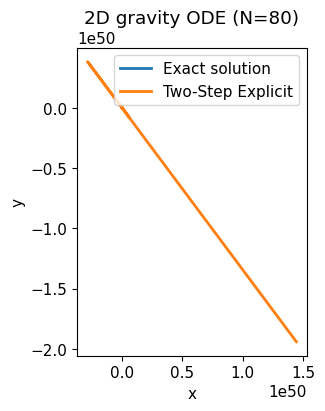

In [136]:
def two_step_explicit(f, y0, y1, t0, h, N):
    t = [t0, t0 + h]
    y = [y0, y1]
    
    a0, a1, b0, b1 = -4, 5, 4, 2
    
    for _ in range(N):
        y.append(a0*y[-1]+a1*y[-2]+h*(b0*f(t[-1], y[-1])+b1*f(t[-2],y[-2])))
        t.append(t[-1] + h)
    
    return t, y



from ode import rk4

for N in [20,40,80]:
    h = 2*np.pi/N

    _,y = rk4(func,y0,0.0,h,1)
    y1 = y[1]
    tt,sol = two_step_explicit(func,y0,y1,0.0,h,N)
    plot_helper(tt,sol,method_label='Two-Step Explicit', N=N)

    print(f'Norm (N={N}): ', np.linalg.norm(sol[-1]))
    # print(f'Energy All (N={N}): ', EnergyFunc(np.array(sol).T))


Norm (N=20):  1.4302791105060482
Norm (N=40):  1.4163318712371467
Norm (N=80):  1.4144815847961731
Norm (N=1000):  1.4142137001231212


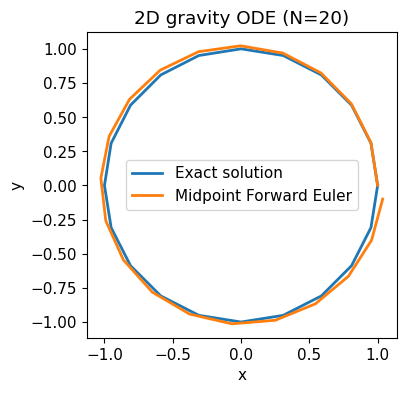

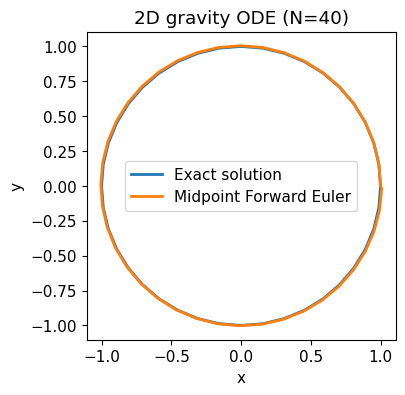

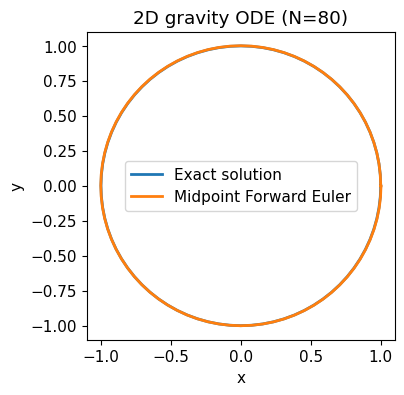

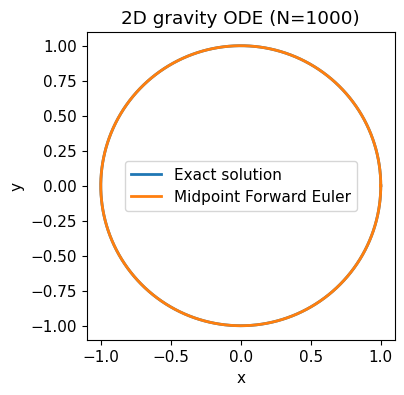

In [138]:
def midpoint_fwd_euler(f, y0, t0, h, N):
    t = [t0,]
    y = [y0,]
    
    for i in range(N):
        y_mid = y[-1] + h/2 * f(t[-1], y[-1])
        t_mid = t[-1] + h/2
        y_next = y[-1] + h * f(t_mid, y_mid)
        y.append(y_next)
        t.append(t[-1] + h)
    
    return t, y
N = 80


for N in [20,40,80]:
    h = 2*np.pi/N
    tt,sol = midpoint_fwd_euler(func,y0,0.0,h,N)
    plot_helper(tt,sol,method_label='Midpoint Forward Euler', N=N)
    print(f'Norm (N={N}): ', np.linalg.norm(sol[-1]))
    # print(f'Energy All (N={N}): ', EnergyFunc(np.array(sol).T))